In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mltools import plot_data, plot_frontiere, make_grid, gen_arti

In [27]:
def mse(w,x,y):
    # a implémenter
    y = y.reshape(-1, 1)
    w = w.reshape(-1, 1)    
    x = x.reshape(y.shape[0],w.shape[0])
    return ((x.dot(w) - y)**2).mean()

def reglog(w,x,y):
    y = y.reshape(-1, 1)
    w = w.reshape(-1, 1)    
    x = x.reshape(y.shape[0],w.shape[0])
    h = x.dot(w)
    sig = 1 / (1 + np.exp(-h))
    cost = -(1 / x.shape[0]) * np.sum(y * np.log(sig) + (1 - y) * np.log(1 - sig))
    return cost


def mse_grad(w,x,y):
    y = y.reshape(-1, 1)
    w = w.reshape(-1, 1)    
    x = x.reshape(y.shape[0],w.shape[0])
    return (x.T.dot(x.dot(w) - y)) * (2 / y.size)

def reglog_grad(w,x,y):
    y = y.reshape(-1, 1)
    w = w.reshape(-1, 1)    
    x = x.reshape(y.shape[0],w.shape[0])
    res = x.dot(w)
    sig = 1 / (1 + np.exp(-res))
    return (1 / x.shape[0]) * (np.dot(x.T, sig) - y)

def grad_check(f,f_grad,N=100):
    
    pass
    
    
def descente_gradient(datax,datay,f_loss,f_grad,eps,iter):
    #w = np.zeros((datax.shape[1],datax.shape[1]))
    print("Bruuuuuuuuuuuuuuuh look at this dude")
    w = np.zeros(datax.shape[1])
    costs = np.zeros(iter)
    
    for i in range(iter):
        cost = f_loss(w,datax,datay)
        #print(cost,'on iter ',i)
        costs[i] = cost
        gradient = f_grad(w,datax,datay)
        w = w.reshape(-1,1)
        w -= gradient * eps
        
    print("now I'm here hahahaha XD")
    w_opti = w[0]
    #costs = np.array(costs)
    print("Bruuuuuuh")
    return w_opti, w, costs


(1000, 2)


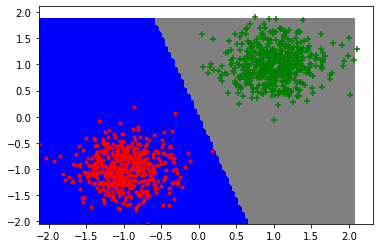

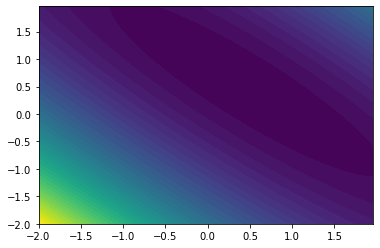

In [28]:
datax, datay = gen_arti(epsilon=0.1)
grid, x, y = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)
plt.figure()
## Visualisation des données et de la frontière de décision pour un vecteur de poids w
print(datax.shape)
w = np.random.randn(datax.shape[1],1)
plot_frontiere(datax,lambda x : np.sign(x.dot(w)),step=100)
plot_data(datax,datay)
## Visualisation de la fonction de coût en 2D
plt.figure()
plt.contourf(x,y,np.array([mse(w,datax,datay).mean() for w in grid]).reshape(x.shape),levels=50)

In [29]:
w_opti, w, costs = descente_gradient(datax,datay,mse,mse_grad,0.1,100)
print(w_opti)
print(w)
print(costs)

Bruuuuuuuuuuuuuuuh look at this dude
now I'm here hahahaha XD
Bruuuuuuh
[0.46920547]
[[0.46920547]
 [0.47945208]]
[1.         0.37238909 0.1614052  0.09047869 0.06663524 0.05861969
 0.055925   0.05501904 0.05471439 0.05461189 0.05457735 0.05456566
 0.05456166 0.05456024 0.05455969 0.05455944 0.05455929 0.05455918
 0.05455909 0.054559   0.05455892 0.05455884 0.05455876 0.05455869
 0.05455862 0.05455856 0.05455849 0.05455843 0.05455838 0.05455832
 0.05455827 0.05455822 0.05455817 0.05455812 0.05455808 0.05455804
 0.054558   0.05455796 0.05455792 0.05455788 0.05455785 0.05455782
 0.05455779 0.05455776 0.05455773 0.0545577  0.05455767 0.05455765
 0.05455762 0.0545576  0.05455758 0.05455756 0.05455754 0.05455752
 0.0545575  0.05455748 0.05455747 0.05455745 0.05455743 0.05455742
 0.05455741 0.05455739 0.05455738 0.05455737 0.05455735 0.05455734
 0.05455733 0.05455732 0.05455731 0.0545573  0.05455729 0.05455728
 0.05455728 0.05455727 0.05455726 0.05455725 0.05455725 0.05455724
 0.05455723 0.0

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# sckit-learn implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(datax, datay)
# Predict
y_predicted = regression_model.predict(datax)

# model evaluation
rmse = mean_squared_error(datay, y_predicted)
r2 = r2_score(datay, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)


Slope: [0.46898807 0.47971822]
Intercept: -0.0070342238763401645
Root mean squared error:  0.054507626669318424
R2 score:  0.9454923733306816


In [31]:
w_opti, w, costs = descente_gradient(datax,datay,reglog,reglog_grad,0.1,100)
print(w_opti)
print(w)
print(costs)

Bruuuuuuuuuuuuuuuh look at this dude


ValueError: operands could not be broadcast together with shapes (2,1) (1000,1) 

In [ ]:
model = LogisticRegression()
model.fit(datax, datay)
parameters = model.coef_
predicted_classes = model.predict(datax)
accuracy = accuracy_score(y.flatten(),predicted_classes)
print('The accuracy score using scikit-learn is {}'.format(accuracy))
print("The model parameters using scikit learn")
print(parameters)